In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**import data** 

In [435]:
Titanic_test = pd.read_csv("C:\\Users\\Vikra\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_test.csv")
Titanic_train =pd.read_csv("C:\\Users\\Vikra\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")
Titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [437]:
Titanic_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [439]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [441]:
Titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* The minimum age of a passenger is 0.42 means a newly born baby
* The maximum age of a passenger is 80 and median of age is 28 and mean is 29.699. That means the max no of passengers belongs to 28 to 30.
* The minimum fare of a ticket is 0 and max is 512.

In [444]:
df= Titanic_train

In [447]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [449]:
df.drop(['PassengerId','Ticket','Cabin'], axis = 1 ,inplace = True) # droping the data its not requred   for model
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [451]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [453]:
df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [455]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [457]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [459]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [461]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [464]:
df['Embarked'].fillna('s', inplace= True)

In [466]:
sns.heatmap( df.isna(),yticklables  )

NameError: name 'yticklables' is not defined

In [468]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Their is no null value**

# visualizations

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        342.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <BarContainer object of 12 artists>)

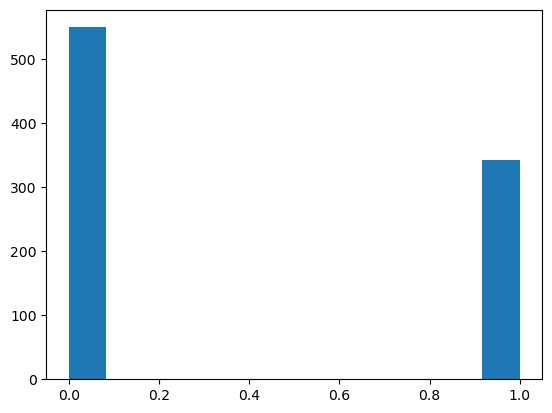

In [472]:
plt.hist(x ='Survived' , bins = 12,data =df)


<Axes: >

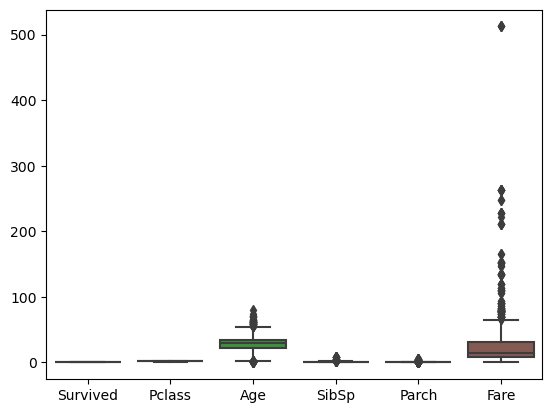

In [473]:
sns.boxplot(data = df)

In [474]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [476]:
df['Sex'].value_counts().reset_index()

,Sex,count
0,male,577
1,female,314


<Axes: xlabel='Survived', ylabel='count'>

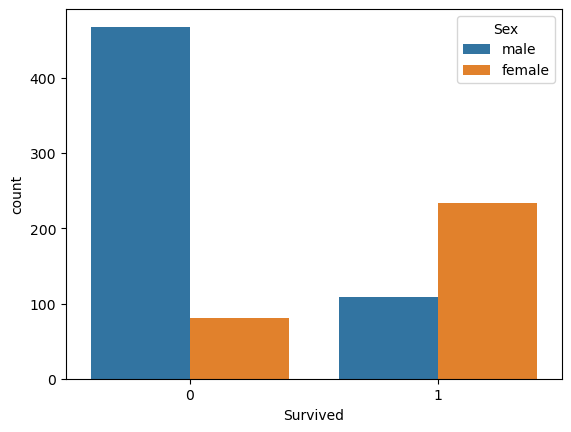

In [477]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

AttributeError: 'numpy.float64' object has no attribute 'startswith'

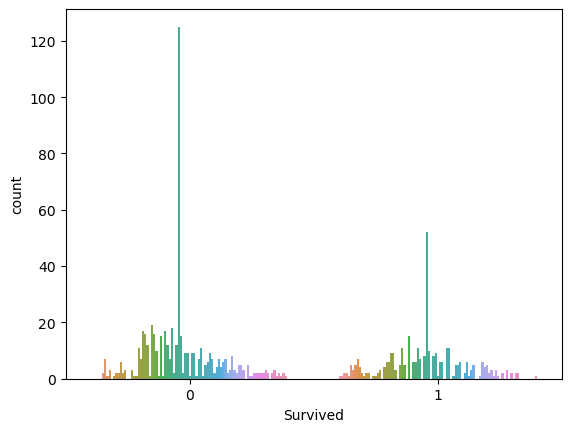

In [478]:
sns.countplot(x = 'Survived', hue = 'Age', data = df)

In [ ]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

In [ ]:
df['Age'].value_counts().reset_index()

In [ ]:
sns.displot(x = 'Age',bins = 15,data = df)

In [ ]:
sns.pairplot(df)

* max no of columns are categorical columns.
* **Age** and **Fare** columns contains continues values.
* There is a noticeable correlation between the **Pclass** and **Fare**, indicating that higher classes generally paid more for their tickets.

#  Model Building

In [ ]:
df.head(6)

In [510]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
lable_er = LabelEncoder()

In [498]:
df['Sex'] = lable_er.fit_transform(df['Sex'])
df['Embarked'] = lable_er.fit_transform(df['Embarked'])

In [ ]:
df

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [488]:
!pip install klib

In [490]:
import klib #correlation matrix using klib
klib.corr_mat(df)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.07,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.33,0.08,0.02,-0.55
Age,-0.07,-0.33,1.00,-0.23,-0.18,0.09
SibSp,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,0.08,0.02,-0.18,0.41,1.00,0.22
Fare,0.26,-0.55,0.09,0.16,0.22,1.00


In [504]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [512]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [516]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [522]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')



Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC AUC Score: 0.88


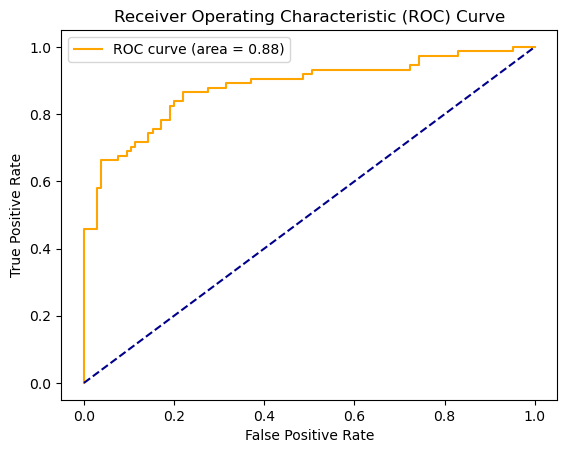

In [520]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()